# Makemytrip Recommendation System

### Summary


*	The objective of this project is to make a recommendation system based on the similarities in the properties of the hotel.  
*	Performed Exploratory Data Analysis and Data Preprocessing on the dataset for further analytics.
*	Created recommendation system using Content Based Collaborative Filtering
    * as per the description of the property 
    * as per City, Hotel Star Rating, MMT Review Score and Property Type
    * Using KNN Algorithm.
*	In the First Model, the approach was to build the recommendation system based on the hotel overview given in the Dataset. Input from the user was taken and recommendation of the similar properties was made based on the keywords used in the Hotel Overview variable.
*	In the Second Model, the approach was to build the recommendation system based on the major factors (City, Hotel Star Rating, Property Type and MMT Review Score) which a user thinks of, while booking a Hotel.
*	In the Third Model, the approach was to use the Standard KNN algorithm to find the similar properties. MinMax scaling was implemented to tackle the dominance of variables with higher values. 
*	Concluded Model 2 as the most appropriate model amongst the three as it gives the most accurate results. Moreover, it takes into consideration the most important variables which matters most to the customer while booking a hotel. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import random
import plotly.graph_objs as go
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

In [2]:
# Reading the CSV File 
df = pd.read_csv('makemytrip_com-travel_sample.csv')

In [3]:
df.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,...,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,24.581788,73.667805,NaN,..,NaN,...,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,24.579942,73.681953,NaN,..,NaN,...,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,0.0,NaN,NaN,...,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,24.580100,73.682200,NaN,..,NaN,...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


In [4]:
print('We have', len(df), 'hotels in the data')

We have 20000 hotels in the data


In [5]:
#Checking the missing values
df.isna().sum()

area                                5287
city                                   0
country                              404
crawl_date                          9274
highlight_value                     2391
hotel_overview                      3284
hotel_star_rating                      0
image_urls                         11483
in_your_room                        5285
is_value_plus                          0
latitude                              19
longitude                             19
mmt_holidayiq_review_count         10672
mmt_location_rating                 8459
mmt_review_count                   10635
mmt_review_rating                   8459
mmt_review_score                   10233
mmt_traveller_type_review_count     2044
mmt_tripadvisor_count               8844
pageurl                                0
property_address                       3
property_id                            0
property_name                          0
property_type                        109
qts             

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,24.581788,73.667805,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,24.579942,73.681953,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},NaN,Families:{{ratingSummaryInfo.miscMap['family']...,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,0.0,NaN,NaN,NaN,NaN,Families:|Couples:|Business:|Solo:|Friends:,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,24.580100,73.682200,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.7,Families:{{ratingSummaryInfo.miscMap['family']...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


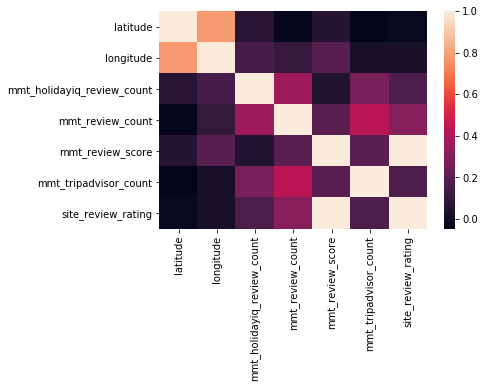

In [8]:
# Plotting heatmap for checking the correlation among the variables
plot = plt.Figure(figsize=(20,20))
sns.heatmap(df.corr())

In [9]:
df.head(10)

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,24.581788,73.667805,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,24.579942,73.681953,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},NaN,Families:{{ratingSummaryInfo.miscMap['family']...,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,0.0,NaN,NaN,NaN,NaN,Families:|Couples:|Business:|Solo:|Friends:,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,24.580100,73.682200,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.7,Families:{{ratingSummaryInfo.miscMap['family']...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0
5,Lake Palace Road,Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Garden Hote...",1 star,NaN,{{value}},no,24.575779,73.694363,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.1,Families:{{ratingSummaryInfo.miscMap['family']...,79.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"OppSajjan Niwas Garden , Lake Palace Road",201409041608347125,Garden Hotel,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.1,makemytrip,NaN,NaN,d7362b28603b1c20454c6b3ecaa91fca
6,Lake Pichola,Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Jagmandir I...",3 star,NaN,{{value}},no,24.567592,73.677763,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},NaN,Families:{{ratingSummaryInfo.miscMap['family']...,92.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lake Pichola , Lake Pichola",201409041737227215,Jagmandir Island Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,88c26b37f8af392

In [10]:
#checking the number of hotels in each city
city_count = df['city'].value_counts().rename_axis('city').reset_index(name='counts')
city_count.head(20)

,city,counts
0,NewDelhiAndNCR,1163
1,Goa,1122
2,Mumbai,543
3,Jaipur,534
4,Bangalore,512
5,Hyderabad,468
6,Srinagar,453
7,New Delhi And NCR,425
8,Pune,392
9,Kolkata,369


In [11]:
#checking the number of hotels with a particular name 
property_name_count = df['property_name'].value_counts().rename_axis('city').reset_index(name='counts')
property_name_count.head(20)

,city,counts
0,Hotel President,21
1,Hotel Samrat,16
2,Hotel Sunshine,15
3,Hotel Paradise,14
4,Hotel Landmark,11
5,Hotel Mayur,11
6,Hotel Relax Inn,11
7,Hotel Regency,11
8,Hotel Natraj,11
9,Hotel Prince,10


In [12]:
df['hotel_star_rating'].head()

0    1 star
1    3 star
2    2 star
3    1 star
4    2 star
Name: hotel_star_rating, dtype: object

In [13]:
df.columns

Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'hotel_star_rating', 'image_urls', 'in_your_room',
       'is_value_plus', 'latitude', 'longitude', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'pageurl', 'property_address', 'property_id',
       'property_name', 'property_type', 'qts', 'query_time_stamp',
       'room_types', 'site_review_count', 'site_review_rating', 'sitename',
       'state', 'traveller_rating', 'uniq_id'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
area                               14713 non-null object
city                               20000 non-null object
country                            19596 non-null object
crawl_date                         10726 non-null object
highlight_value                    17609 non-null object
hotel_overview                     16716 non-null object
hotel_star_rating                  20000 non-null object
image_urls                         8517 non-null object
in_your_room                       14715 non-null object
is_value_plus                      20000 non-null object
latitude                           19981 non-null float64
longitude                          19981 non-null float64
mmt_holidayiq_review_count         9328 non-null float64
mmt_location_rating                11541 non-null object
mmt_review_count                   9365 non-null float64
mmt_review_rating                  

In [15]:
#removing "star" char from hotel_star_rating column and standardizing the values

df['hotel_star_rating']=df['hotel_star_rating'].replace('1 star',1).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('2 star',2).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('3 star',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('4 star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('5 star',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Three on 5',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four on 5',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Five on 5',5).astype(str)

In [16]:
df.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1,NaN,{{value}},no,24.581788,73.667805,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2,NaN,{{value}},no,24.579942,73.681953,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},NaN,Families:{{ratingSummaryInfo.miscMap['family']...,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,0.0,NaN,NaN,NaN,NaN,Families:|Couples:|Business:|Solo:|Friends:,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2,NaN,{{value}},no,24.580100,73.682200,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.7,Families:{{ratingSummaryInfo.miscMap['family']...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


In [17]:
df['hotel_star_rating'].unique()

array(['1', '3', '2', '4', '0', '5'], dtype=object)

In [18]:
df.head(20)

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1,NaN,{{value}},no,24.581788,73.667805,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2,NaN,{{value}},no,24.579942,73.681953,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},NaN,Families:{{ratingSummaryInfo.miscMap['family']...,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,0.0,NaN,NaN,NaN,NaN,Families:|Couples:|Business:|Solo:|Friends:,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2,NaN,{{value}},no,24.580100,73.682200,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.7,Families:{{ratingSummaryInfo.miscMap['family']...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0
5,Lake Palace Road,Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Garden Hote...",1,NaN,{{value}},no,24.575779,73.694363,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.1,Families:{{ratingSummaryInfo.miscMap['family']...,79.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"OppSajjan Niwas Garden , Lake Palace Road",201409041608347125,Garden Hotel,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.1,makemytrip,NaN,NaN,d7362b28603b1c20454c6b3ecaa91fca
6,Lake Pichola,Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Jagmandir I...",3,NaN,{{value}},no,24.567592,73.677763,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},NaN,Families:{{ratingSummaryInfo.miscMap['family']...,92.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lake Pichola , Lake Pichola",201409041737227215,Jagmandir Island Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,88c26b37f8af392c203700d8fc02a798
7,Udaipur,Udaipur

In [19]:
# Dropping null values in property_type variable
df.dropna(subset=['property_type'],inplace=True)

In [20]:
df.isnull().sum()

area                                5189
city                                   0
country                              399
crawl_date                          9274
highlight_value                     2329
hotel_overview                      3185
hotel_star_rating                      0
image_urls                         11374
in_your_room                        5192
is_value_plus                          0
latitude                              19
longitude                             19
mmt_holidayiq_review_count         10563
mmt_location_rating                 8351
mmt_review_count                   10528
mmt_review_rating                   8351
mmt_review_score                   10126
mmt_traveller_type_review_count     1937
mmt_tripadvisor_count               8736
pageurl                                0
property_address                       3
property_id                            0
property_name                          0
property_type                          0
qts             

In [21]:
# calculating the mean value of mmt_review_score as per the hotel_star_rating variable
df_1 = df.groupby('hotel_star_rating')['mmt_review_score'].mean()

In [22]:
df_1

hotel_star_rating
0    2.969231
1    3.001831
2    3.562797
3    3.839961
4    4.154737
5    4.394966
Name: mmt_review_score, dtype: float64

In [23]:
# filling the missing values by the mean value calculated above 
df['mmt_review_score'] = df['mmt_review_score'].fillna(df.groupby('hotel_star_rating')['mmt_review_score'].transform('mean'))


In [24]:
df['mmt_review_score'].head(20)

0     4.500000
1     4.500000
2     3.562797
3     3.001831
4     3.700000
5     4.100000
6     3.839961
7     3.900000
8     4.800000
9     4.700000
10    3.001831
11    4.800000
12    2.000000
13    4.500000
14    4.000000
15    3.001831
16    3.001831
17    4.200000
18    4.500000
19    3.001831
Name: mmt_review_score, dtype: float64

In [25]:
pd.isnull(df['mmt_review_score']).sum()

0

In [26]:
df[['hotel_star_rating','mmt_review_score']].head(20)

,hotel_star_rating,mmt_review_score
0,1,4.500000
1,3,4.500000
2,2,3.562797
3,1,3.001831
4,2,3.700000
5,1,4.100000
6,3,3.839961
7,3,3.900000
8,4,4.800000
9,2,4.700000


In [27]:
# Converting string variables 'city' and 'property_type' to integer and creating the new corresponding variable 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['city_num'] = labelencoder.fit_transform(df['city'])
df['property_type_new'] = labelencoder.fit_transform(df['property_type'])

In [28]:
df.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1,NaN,{{value}},no,24.581788,73.667805,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.500000,Families:{{ratingSummaryInfo.miscMap['family']...,6.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...",201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e,723,7
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.500000,Families:{{ratingSummaryInfo.miscMap['family']...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944,723,7
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2,NaN,{{value}},no,24.579942,73.681953,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.562797,Families:{{ratingSummaryInfo.miscMap['family']...,16.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...",201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e,723,7
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,0.0,NaN,NaN,NaN,3.001831,Families:|Couples:|Business:|Solo:|Friends:,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok",201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56,723,7
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2,NaN,{{value}},no,24.580100,73.682200,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.700000,Families:{{ratingSummaryInfo.miscMap['family']...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0,723,7


In [29]:
# as we have many cities here , i am going to choose few cities only to try visualization # selected top cities to create a new Dataframe #Hyderabad,Kolkata,Guwahati,Mumbai,NewDelhiAndNCR,Bangalore,Vijaywada,Chennai
cities = ['Hyderabad','Kolkata','Guwahati','Mumbai','NewDelhiAndNCR','Bangalore','Vijaywad']
newdf = df.loc[df['city'].isin(cities)]


In [30]:
# here as we can see that there are no. of duplicate entries for same 'Area' of particular

newdf[newdf['area']=='Ballygunge']

# So , what i am doing is that, i will remove duplicates and keep only one entry for a area # and store in newdf itself


newdf = newdf.drop_duplicates(subset='area', keep="first")


# remove duplicate latitude and longitude

newdf = newdf.drop_duplicates(subset=['latitude','longitude'], keep="first")


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
43,Ballygunge,Kolkata,India,2016-09-04,Air Conditioned|Assistance with luggage on req...,The Samilton is situated in Kolkata. The prope...,3,NaN,Tea/Coffee Maker|Telephone|24-hr Room Service|...,no,22.533848,88.353182,NaN,Location:4.1,47.0,Excellent:15|Very Good:5|Average:17|Poor:7|Ter...,3.700000,Family:2|Couple:11|Solo:8|Friends:1|Business:3,71.0,https://hotelz.makemytrip.com/makemytrip/site/...,"35A, Sarat Bose Road Bhawanipur,South Kolkata",200701111339522408,The Samilton,Hotel,2016-09-04 19:00:35 +0000,2016-09-04 19:00:35 +0000,Standard|Superior Room,NaN,NaN,makemytrip,West Bengal,Location:4.1/5 | Hospitality:3.9/5 | Facilitie...,a869e4a730a1ac8e933cde3feb0ddb6d,373,7
2077,Ballygunge,Kolkata,India,NaN,{{facility}},"|Situated in Kolkata, the Cultural Capital of ...",2,NaN,{{value}},no,22.524056,88.353223,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.800000,Families:{{ratingSummaryInfo.miscMap['family']...,1.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"5B Lansdowne Place , Hazra More",201506091252276172,COMFOTEL,Hotel,NaN,2016-05-12 23:12:52 +0000,NaN,NaN,NaN,makemytrip,NaN,NaN,31613d3a061ec62cd88466b27f207b72,373,7
5866,Ballygunge,Kolkata,India,NaN,Airport/Rlwy Stn Transfer|Arrangements Of Kitt...,"|Located 9.4 km from Kolkata Railway Terminus,...",3,//imghtlak.mmtcdn.com/images/hotels/2008051413...,Tea/Coffee Maker | Telephone | 24-hr Room Serv...,no,22.533373,88.353038,5.0,4.1,12.0,Excellent:2|Very Good:2|Average:4|Poor:2|Terri...,3.300000,Families:0|Couples:1|Business:4|Solo:2|Friends:0,50.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"41/1F Sarat Bose Road , Sarat Bose Road, Bhawa...",200805141301521703&i=,Pan Asia Continental,Hotel,NaN,2016-05-01 12:35:41 +0000,Luxury|Royale|Suite,NaN,NaN,makemytrip,NaN,Location:4.1/5 | Hospitality:3.3/5 | Facilitie...,fb2e1c48d98f10b629031a758b2a76d2,373,7
7567,Ballygunge,Kolkata,India,2016-06-22,{{facility}},"|1.9 km from Victoria Memorial, 3.1 km from Na...",1,NaN,{{value}},no,22.532627,88.353320,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.700000,Families:{{ratingSummaryInfo.miscMap['family']...,31.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"44-A, Sarat Bose Road, , Ballygunge",200902260946417812,Hotel Manglam,Hotel,NaN,2016-06-22 14:52:48 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,0b2a867c4bd95faa9e54108913e9dc80,373,7
8031,Ballygunge,Kolkata,India,NaN,Airport Transfer|Business Centre|Conference Ha...,|Hotel 1 Lovelock is located in Kolkata.| The ...,2,//imghtlak.mmtcdn.com/images/hotels/2010110420...,Minibar | Tea/Coffee Maker | Electronic Safe |...,no,22.532246,88.355872,0.0,3,1.0,Excellent:0|Very Good:0|Average:0|Poor:0|Terri...,1.300000,Families:1|Couples:0|Business:0|Solo:0|Friends:0,20.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"1, Love lock Street, Behind Punjab Club , Ball...",201011042035067340&i=,Hotel 1 Lovelock,Hotel,NaN,2016-01-29 03:20:06 +0000,Deluxe Room,NaN,NaN,makemytrip,NaN,Location:3/5 | Hospitality:1/5 | Facilities:1/...,8b5a240032e5ad391cfd73659e295f3e,373,7
8039,Ballygunge,Kolkata,India,NaN,Airport/Rlwy Stn Transfer|Arrangements Of Kitt...,"|Located 9.4 km from Kolkata Railway Terminus,...",3,//imghtlak.mmtcdn.com/hotels/20080514130152170...,Tea/Coffee Maker | Telephone | 24-hr Room Serv...,no,22.533373,88.353038,0.0,3.9,9.0,Excellent:1|Very Good:2|Average:3|Poor:1|Terri...,3.200000,Families:0|Couples:0|Business:4|Solo:2|Friends:0,50.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"41/1F Sarat Bose Road , Sarat Bose R

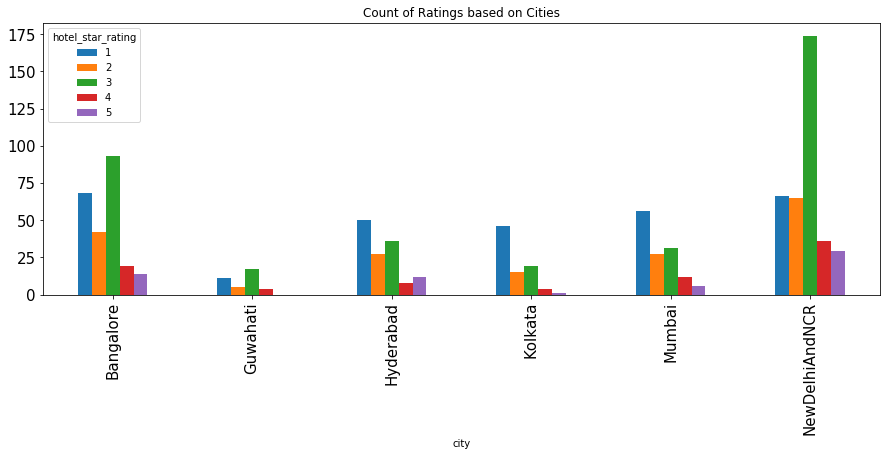

In [31]:

# now crosstab to create DF to visualize
s = pd.crosstab(index=newdf['city'],columns=newdf['hotel_star_rating'])
bar = s.plot(kind='bar',figsize=(15,5),title='Count of Ratings based on Cities',fontsize=15)
bar


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

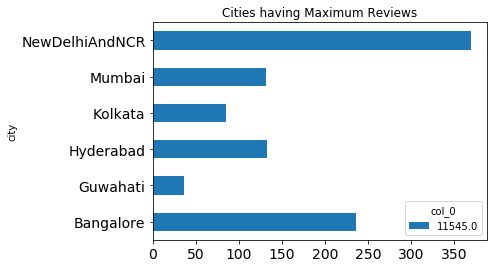

In [32]:
plt.figure(figsize=(12,6))
newdf2 = newdf['city'].groupby(newdf.mmt_review_count)
kk = pd.crosstab(index=newdf['city'],columns=newdf['mmt_review_count'].sum()) 
kk.plot(kind='barh',title='Cities having Maximum Reviews', fontsize=14)


In [33]:
data = pd.DataFrame(newdf, columns = ['latitude','longitude','area']) #[:50]  <-this kind of slice is useful for developing a map
data.area = data.area.fillna('none')

# remove those rows where latitude & longitude is null
data = data.drop(data[data.latitude.isnull()].index)
data = data.drop(data[data.longitude.isnull()].index)

In [34]:
import folium
import sys
#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(location=[point.latitude,point.longitude],
                        radius=5,
                        weight=2,
                        popup = point.area,
                        fill_color='red').add_to(this_map)

sada1= data.apply(plotDot, axis = 1)
this_map.fit_bounds(this_map.get_bounds())

In [35]:
this_map


In [36]:
# Here we can see that some locations areas ar fake, they are pointing to outside of India

# Lets remove them
# action to remove that out of India locations..
data = data.drop(data[data.area=='Bapujinagar, Jadavpur'].index)
data = data.drop(data[data.area=='NEAR TANK NO - 9'].index)
data = data.drop(data[data.area=='Besides Peddamma Temple'].index)
data = data.drop(data[data.area=='Dollars Colony'].index)
data = data.drop(data[data.area=='HRBR layout, Bangalore'].index)
data = data.drop(data[data.area=='west Extension'].index)
data = data.drop(data[data.area=='201301'].index)
data = data.drop(data[data.area=='None'].index)
data = data.drop(data[data.area=='none'].index)
data = data.drop(data[data.area=='RMV Ext , Sanjaynagar'].index)
data = data.drop(data[data.area=='M.G. Road'].index)

In [37]:
import folium
import sys
#create a map
this_map = folium.Map(prefer_canvas=True)
def plotDot(point):
    folium.CircleMarker(location=[point.latitude,point.longitude],
                        radius=5,
                        weight=2,
                        popup = point.area,
                        fill_color='red').add_to(this_map)
sada= data.apply(plotDot, axis = 1)
this_map.fit_bounds(this_map.get_bounds())

In [38]:
this_map

# # Model 1- Creating recommendation as per the description of the property 

In [39]:
# import pandas as pd
# import numpy as np
# from nltk.corpus import stopwords
# from sklearn.metrics.pairwise import linear_kernel
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import re
# import random
# import plotly.graph_objs as go
# pd.options.display.max_columns = 30
# from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
# InteractiveShell.ast_node_interactivity = 'all'
# from plotly.offline import iplot
# import cufflinks
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='solar')
# print('We have ', len(df), 'hotels in the data')


In [40]:
# Asking the user to input the city, property type and Hotel star rating 
city_visit = input("Enter the city:")
star_rating = input("Enter hotel star rating(1/2/3/4/5):")
prop_type = input("Enter property type(Hotel/Lodge/Resort/Palace...:")

Enter the city:Udaipur
Enter hotel star rating(1/2/3/4/5):4
Enter property type(Hotel/Lodge/Resort/Palace...:Hotel


In [41]:
# Filter the dataset and creating new data as per the user input
filter1 = df['city'] == city_visit
filter2 = df['hotel_star_rating'] == star_rating
filter3 = df['property_type'] == prop_type
small_dataset = filter1 & filter2 & filter3
df1 = df[small_dataset]

In [42]:
# Function to view the property description along with the name
def print_description(index):
    example = df[df.index == index][['property_name', 'hotel_overview']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])

In [43]:
print_description(14)

Shree Narayana
Name: |Hotel Shree Narayana, nestled in beautiful citu of Udaipur. It is located at a distance of 21.5 km from Maharana Pratap Airport and 3.5 km away from Rana Pratap Nagar Railway Station. Popular tourist spots to visit at Udaipur are Fateh Sagar Lake (4.7 km), City Palace (2.3 km), Saheliyon-ki-Bari (3.8 km), Lake Pichola (3.7 km), Jagdish Temple (2.1 km) and many more places to explore within the vicinity. A host of modern amenities offered by the hotel are air-conditioning, Wi-Fi, security, credit cards acceptance, laundry service, car rental, parking, wake up call service (on request) and airport transfer (chargeable). Backed by a team of skilled professionals, the property ensures that all needs of guests are fulfilled timely.| Guests can savour a variety of delicious dishes at the on-site restaurant and experience the exquisite in-house dining. Relish evening drinks and spend some quality time with friends at the in-house bar.| The property comprises of a busines

In [44]:
df1['hotel_overview'].dropna(inplace=True)

In [45]:
# pip install cufflinks

In [46]:
#function to display the top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df1['hotel_overview'], 15)
df2 = pd.DataFrame(common_words, columns = ['hotel_overview' , 'count'])
df2.groupby('hotel_overview').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Top 20 words in hotel description before removing stop words')


In [47]:
# Function to display the top n trigram before removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df1['hotel_overview'], 15)
df5 = pd.DataFrame(common_words, columns = ['hotel_overview' , 'count'])
df5.groupby('hotel_overview').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in hotel description before removing stop words')


In [48]:
# Function to display the top n trigram after removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df1['hotel_overview'], 15)
df6 = pd.DataFrame(common_words, columns = ['hotel_overview' , 'count'])
df6.groupby('hotel_overview').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in hotel description after removing stop words')


In [49]:
df1['word_count'] = df1['hotel_overview'].apply(lambda x: len(str(x).split()))
desc_lengths = list(df1['word_count'])
print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))

Number of descriptions: 9 
Average word count 215.33333333333334 
Minimum word count 131 
Maximum word count 326


In [50]:
df1['word_count'].iplot(
    kind='hist',
    bins = 50,
    linecolor='black',
    xTitle='word count',
    yTitle='count',
    title='Word Count Distribution in Hotel Description')

In [51]:
df1['hotel_overview']=df1['hotel_overview'].astype('str')

In [52]:
df1[df1['city']=='Udaipur']

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new,word_count
8,"City Palace,The City Palace Complex",Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Shiv Niwas ...",4,NaN,{{value}},no,24.574291,73.684014,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.800000,Families:{{ratingSummaryInfo.miscMap['family']...,344.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lake Pichola, The Palace Complex , Udaipur",201409041809296660,Shiv Niwas Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.8,makemytrip,NaN,NaN,25c1973c76b18e2eef860230fd48d621,723,7,156
24,Udaipur Railway Station,Udaipur,India,2016-06-21,{{facility}},|Le Roi Udaipur is situated in a city of artif...,4,NaN,{{value}},no,24.568300,73.699100,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.500000,Families:{{ratingSummaryInfo.miscMap['family']...,39.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"City Railway Station, Udaipur , Udaipur Railwa...",201412101136318724,Le Roi Udaipur,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,8065a749a72b27dc3b435f7966c60d4f,723,7,131
243,"Ashok Nagar, Main Road",Udaipur,India,NaN,24-Hour Front Desk|Babysitting or child care|C...,"|Nestled in city of Udaipur, also known as the...",4,//imghtlak.mmtcdn.com/images/hotels/2015112113...,Electronic Safe | Telephone | Bathroom Toiletr...,no,24.586243,73.710702,0.0,NaN,NaN,NaN,4.154737,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lakecity Mall, University Road , Ashok Nagar, ...",201511211338075905&i=,Radisson Udaipur,Hotel,NaN,2016-04-30 15:42:52 +0000,1 King Bed Superior,NaN,NaN,makemytrip,NaN,NaN,70bf69a8c4c7d4df70ae4ed49bcf2697,723,7,249
248,Airport Road,Udaipur,India,NaN,24-Hour Front Desk|Bar|Coffee Shop|Conference ...,|GenX Valley View Udaipur is located in histor...,4,//imghtlak.mmtcdn.com/images/hotels/2015120914...,Tea/Coffee Maker | Bathroom Toiletries | Room ...,no,24.593977,73.769706,0.0,NaN,NaN,NaN,4.154737,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Plot No.10, Nr. Maa Gayatri Hospital, Pratap N...",201512091433568833&i=,GenX Valley View Udaipur,Hotel,NaN,2016-04-30 15:42:52 +0000,Deluxe|Executive Room|Premium Room|Valley View...,NaN,NaN,makemytrip,NaN,NaN,a7e78b53d64f7eac1a4dbeb670b887f6,723,7,304
3081,Udaipur Railway Station,Udaipur,India,2016-07-03,24 hour concierge|24 hour reception|24 hour se...,"Situated at 30 minutes from Airport, 10 minute...",4,NaN,Telephone|Bathroom Toiletries|Room Service|Stu...,no,24.552939,73.702640,NaN,Location:3.8,146.0,Excellent:64|Very Good:36|Average:26|Poor:16|T...,4.100000,Family:82|Couple:19|Solo:3|Friends:4|Business:4,344.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Hiran Magri, Sector No 11, Near Savina Math",200707191009129960,"Rajputana, Udaipur - A juSTa Resort",Hotel,2016-07-03 07:32:31 +0000,2016-07-03 07:32:31 +0000,Deluxe|Premier|VILLA with Garden view,NaN,NaN,makemytrip,Rajasthan,Location:3.8/5 | Hospitality:4.2/5 | Facilitie...,24bba2ea705d3bcde5054aa0d03c3947,723,7,179
11652,"Fateh Sagar Lake,Sahelion ki Bari,Sukhadia Cir...",Udaipur,India,2016-06-05,Airport Transfer|Baby sitting|Business centre|...,"|1.9 km from Fateh Sagar Lake, 6.1 km from Ran...",4,//imghtlak.mmtcdn.com/images/hotels/2011040112...,Tea/Coffee Maker | Bathroom Toiletries | Fruit...,no,24.602703,73.689095,47.0,4.7,30.0,Excellent:19|Very Good:4|Average:6|Poor:1|Terr...,4.500000,Families:8|Couples:9|Business:2|Solo:2|Friends:0,548.0,http://hote

Text Preprocessing

In [53]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df1['hotel_overview_clean'] = df1['hotel_overview'].apply(clean_text)

In [54]:
df1['hotel_overview_clean']

8        nestled city lakes shiv niwas palace budget pr...
24       le roi udaipur situated city artificial lakes ...
243      nestled city udaipur also known city lakes lov...
248      genx valley view udaipur located historic capi...
3081     situated 30 minutes airport 10 minutes drive c...
11652    19 km fateh sagar lake 61 km rana pratap nagar...
11675    hotel shree vilas situated udaipur known city ...
12845    nestled city udaipur also known city lakes lov...
16102    set green atmosphere incredible resort gives v...
Name: hotel_overview_clean, dtype: object

In [55]:
df1.set_index('property_name', inplace = True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df1['hotel_overview_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df1.index)

def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 5 most similar hotels except itself
    top_5_indexes = list(score_series.iloc[1:6].index)
    
    # populating the list with the names of the top 5 matching hotels
    for i in top_5_indexes:
        recommended_hotels.append(list(df1.index)[i])
        
    return recommended_hotels

In [56]:
recommendations('Shiv Niwas Palace')

['Radisson Udaipur',
 'Radisson Udaipur',
 'Hotel Shree Vilas',
 'GenX Valley View Udaipur',
 'Rajputana, Udaipur - A juSTa Resort']

In [57]:
#Checking the recommended hotels as per the input
df[df['property_name']=='Shiv Niwas Palace']
df[df['property_name']=='Radisson Udaipur']
df[df['property_name']=='Hotel Shree Vilas']
df[df['property_name']=='GenX Valley View Udaipur']
df[df['property_name']=='Rajputana, Udaipur - A juSTa Resort']


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
8,"City Palace,The City Palace Complex",Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Shiv Niwas ...",4,NaN,{{value}},no,24.574291,73.684014,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.8,Families:{{ratingSummaryInfo.miscMap['family']...,344.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lake Pichola, The Palace Complex , Udaipur",201409041809296660,Shiv Niwas Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.8,makemytrip,NaN,NaN,25c1973c76b18e2eef860230fd48d621,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
243,"Ashok Nagar, Main Road",Udaipur,India,NaN,24-Hour Front Desk|Babysitting or child care|C...,"|Nestled in city of Udaipur, also known as the...",4,//imghtlak.mmtcdn.com/images/hotels/2015112113...,Electronic Safe | Telephone | Bathroom Toiletr...,no,24.586243,73.710702,0.0,NaN,NaN,NaN,4.154737,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lakecity Mall, University Road , Ashok Nagar, ...",201511211338075905&i=,Radisson Udaipur,Hotel,NaN,2016-04-30 15:42:52 +0000,1 King Bed Superior,NaN,NaN,makemytrip,NaN,NaN,70bf69a8c4c7d4df70ae4ed49bcf2697,723,7
12845,"Ashok Nagar, Main Road",Udaipur,India,NaN,24-Hour Front Desk|Babysitting or child care|C...,"|Nestled in city of Udaipur, also known as the...",4,//imghtlak.mmtcdn.com/images/hotels/2015112113...,Electronic Safe | Telephone | Bathroom Toiletr...,no,24.586243,73.710702,0.0,NaN,NaN,NaN,4.154737,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lakecity Mall, University Road , Ashok Nagar, ...",201511211338075905,Radisson Udaipur,Hotel,NaN,2016-05-13 08:08:02 +0000,1 King Bed Superior,NaN,NaN,makemytrip,NaN,NaN,d983b6af278cccc24d962c324c51e3d9,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
11675,"Lake Pichola,Naga Nagri",Udaipur,India,2016-06-05,Airport Transfer|Bar|Coffee Shop|Conference Ha...,|Hotel Shree Vilas is situated in Udaipur whic...,4,//imghtlak.mmtcdn.com/images/hotels/2012080612...,Hot/cold Water | Attached Bathroom | Bathroom ...,no,24.579,73.678,67.0,4.4,9.0,Excellent:6|Very Good:0|Average:3|Poor:0|Terri...,4.3,Families:5|Couples:2|Business:0|Solo:0|Friends:1,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Naga Nagri, Behind Hotel Leela Place 5 o/s Cha...",201208061243422184,Hotel Shree Vilas,Hotel,NaN,2016-06-05 12:07:08 +0000,Luxury Non Lake Facing Room|Luxury Lake Facing...,NaN,NaN,makemytrip,NaN,Location:4.4/5 | Hospitality:4.4/5 | Facilitie...,41e2d84860b45a83533a56687e8b50da,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
248,Airport Road,Udaipur,India,NaN,24-Hour Front Desk|Bar|Coffee Shop|Conference ...,|GenX Valley View Udaipur is located in histor...,4,//imghtlak.mmtcdn.com/images/hotels/2015120914...,Tea/Coffee Maker | Bathroom Toiletries | Room ...,no,24.593977,73.769706,0.0,NaN,NaN,NaN,4.154737,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Plot No.10, Nr. Maa Gayatri Hospital, Pratap N...",201512091433568833&i=,GenX Valley View Udaipur,Hotel,NaN,2016-04-30 15:42:52 +0000,Deluxe|Executive Room|Premium Room|Valley View...,NaN,NaN,makemytrip,NaN,NaN,a7e78b53d64f7eac1a4dbeb670b887f6,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
3081,Udaipur Railway Station,Udaipur,India,2016-07-03,24 hour concierge|24 hour reception|24 hour se...,"Situated at 30 minutes from Airport, 10 minute...",4,NaN,Telephone|Bathroom Toiletries|Room Service|Stu...,no,24.552939,73.70264,NaN,Location:3.8,146.0,Excellent:64|Very Good:36|Average:26|Poor:16|T...,4.1,Family:82|Couple:19|Solo:3|Friends:4|Business:4,344.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Hiran Magri, Sector No 11, Near Savina Math",200707191009129960,"Rajputana, Udaipur - A juSTa Resort",Hotel,2016-07-03 07:32:31 +0000,2016-07-03 07:32:31 +0000,Deluxe|Premier|VILLA with Garden view,NaN,NaN,makemytrip,Rajasthan,Location:3.8/5 | Hospitality:4.2/5 | Facilitie...,24bba2ea705d3bcde5054aa0d03c3947,723,7


In the above model, My approach was to build the recommendation system based on the Hotel Overview given in the Dataset.I took an input from the user and recommended the similar properties based on the keywords used in the Hotel Overview. I used a Count Vectorizer to create our count matrix.I calculated the cosine similarities and returned the Hotels that are most similar.

# # Model 2 - Creating Recommendation as per City, Hotel Star Rating, MMT Review Score and Property Type


In [58]:
df_meta=df.copy()

In [59]:
df_meta['highlight_value'].fillna('Missing Facilities',inplace = True)

In [60]:
# Converting the type of Variable
df_meta['hotel_star_rating']=df['hotel_star_rating'].astype(str)
df_meta['mmt_review_score']=df['mmt_review_score'].astype(str)

In [61]:
len(df_meta)

19891

In [62]:
# Combing City, Hotel Star Rating, Property Type and MMT Review Score into single Variable
import numpy as np
df_meta['combined'] = df_meta['city'] +' '+ df_meta['hotel_star_rating'] +' '+ df_meta['property_type'] + ' '+df_meta['mmt_review_score']
df_meta['combined'].head(50)

0                        Udaipur 1 Hotel 4.5
1                        Udaipur 3 Hotel 4.5
2         Udaipur 2 Hotel 3.5627971254836988
3          Udaipur 1 Hotel 3.001831187410577
4                        Udaipur 2 Hotel 3.7
5                        Udaipur 1 Hotel 4.1
6         Udaipur 3 Hotel 3.8399606299212534
7                        Udaipur 3 Hotel 3.9
8                        Udaipur 4 Hotel 4.8
9                        Udaipur 2 Hotel 4.7
10         Udaipur 1 Hotel 3.001831187410577
11                       Udaipur 3 Hotel 4.8
12                       Udaipur 1 Hotel 2.0
13                       Udaipur 1 Hotel 4.5
14                       Udaipur 3 Hotel 4.0
15         Udaipur 1 Hotel 3.001831187410577
16         Udaipur 1 Hotel 3.001831187410577
17                       Udaipur 2 Hotel 4.2
18                       Udaipur 3 Hotel 4.5
19         Udaipur 1 Hotel 3.001831187410577
20         Udaipur 1 Hotel 3.001831187410577
21        Udaipur 3 Hotel 3.8399606299212534
22        

In [63]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(df_meta['combined'])

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)


In [65]:
hotel_name = df['property_name']
indices = pd.Series(df.index, index=df['property_name'])

In [66]:
indices['Shiv Niwas Palace']

8

In [67]:
def get_recommendations(hotel):
    idx = indices[hotel]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    property_indices = [i[0] for i in sim_scores]
    return hotel_name.iloc[property_indices]





In [68]:
lst=get_recommendations(8)
lst

1                   Araliayas Resorts
4    Hotel Pichola Haveli (LAKE SIDE)
5                        Garden Hotel
7                 Shikarbadi Heritage
8                   Shiv Niwas Palace
Name: property_name, dtype: object

In [69]:
#Checking the recommended hotels as per the index value(8) put in the function above
df[df['property_name']== 'Shiv Niwas Palace']
df[df['property_name']== 'Araliayas Resorts']
df[df['property_name']== 'Hotel Pichola Haveli (LAKE SIDE)']
df[df['property_name']== 'Garden Hotel']
df[df['property_name']== 'Shikarbadi Heritage']




,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
8,"City Palace,The City Palace Complex",Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Shiv Niwas ...",4,NaN,{{value}},no,24.574291,73.684014,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.8,Families:{{ratingSummaryInfo.miscMap['family']...,344.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lake Pichola, The Palace Complex , Udaipur",201409041809296660,Shiv Niwas Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.8,makemytrip,NaN,NaN,25c1973c76b18e2eef860230fd48d621,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3,NaN,{{value}},no,24.544342,73.644242,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.5,Families:{{ratingSummaryInfo.miscMap['family']...,34.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Udaipur-Jhadol Road , Near Nai Gaon",201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2,NaN,{{value}},no,24.5801,73.6822,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.7,Families:{{ratingSummaryInfo.miscMap['family']...,139.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...",201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
5,Lake Palace Road,Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Garden Hote...",1,NaN,{{value}},no,24.575779,73.694363,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.1,Families:{{ratingSummaryInfo.miscMap['family']...,79.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"OppSajjan Niwas Garden , Lake Palace Road",201409041608347125,Garden Hotel,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.1,makemytrip,NaN,NaN,d7362b28603b1c20454c6b3ecaa91fca,723,7
1851,NaN,Udaipur,India,2016-07-25,24 hour business centre|Free WiFi Internet|Lau...,"Nestled in the City of Lakes, The Garden Hotel...",1,NaN,Telephone|Television|Wardrobe|Hot/cold Water|A...,no,24.575779,73.694363,NaN,Location:4.0,2.0,Excellent:0|Very Good:2|Average:0|Poor:0|Terri...,4.0,Family:2|Couple:0|Solo:0|Friends:0|Business:0,79.0,http://hotelz.makemytrip.com/makemytrip/site/h...,OppSajjan Niwas Garden Lake Palace Road,201409041608347125,Garden Hotel,Hotel,2016-07-25 16:01:11 +0000,2016-07-25 16:01:11 +0000,Standard Room|Superior Room,NaN,NaN,makemytrip,Rajasthan,Location:4.0/5 | Hospitality:4.0/5 | Facilitie...,06eadaaeb6052c78ba61972bab886075,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
7,Udaipur,Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, Shikarbadi Hote...",3,NaN,{{value}},no,24.5452,73.6784,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.9,Families:{{ratingSummaryInfo.miscMap['family']...,176.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Goverdhan Vilas , Udaipur",201409041749354262,Shikarbadi Heritage,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.9,makemytrip,NaN,NaN,38f275baaa223914769b73479d981551,723,7


In the above model, My approach was to build the recommendation system by taking into consideration the major factor which a user thinks of while booking a Hotel. The factors were City,Hotel Star Rating, Property Type and MMT Review Score. I combined all the variables in one variable and used the same for the recommendation. I then used a Count Vectorizer to create our count matrix as we did in Model 1.The remaining steps were similar to what I did earlier where I calculated the cosine similarities and returned the Hotels that are most similar.

# #Model 3- Creating Recommendation using KNN 

In [70]:
df_knn=df.copy()

In [71]:
# Dropping Irrelevant Variables
df_knn.drop(['area','country','crawl_date','highlight_value','image_urls',
         'in_your_room','is_value_plus','mmt_holidayiq_review_count','mmt_location_rating','mmt_review_count','mmt_review_rating','mmt_traveller_type_review_count',
        'mmt_tripadvisor_count','pageurl','property_address','qts','query_time_stamp',
        'room_types','site_review_count','sitename','state','traveller_rating','uniq_id',
        'city','property_type'],axis=1,inplace=True)

#df after keeping only relevant variables for KNN 
df_knn.head(10)



,hotel_overview,hotel_star_rating,latitude,longitude,mmt_review_score,property_id,property_name,site_review_rating,city_num,property_type_new
0,|Zion Home Stay is located in a city that sets...,1,24.581788,73.667805,4.500000,201302071713316867,Zion Home Stay,4.5,723,7
1,| Araliayas Resorts is a 3 star hotel located ...,3,24.544342,73.644242,4.500000,201312041703404727,Araliayas Resorts,4.5,723,7
2,|A 2 star property is located at 24 km from Ma...,2,24.579942,73.681953,3.562797,201407171324437682,Shri Udai Palace,NaN,723,7
3,|SNP House Airport Hotel And Restaurant is loa...,1,24.622607,73.855194,3.001831,201407181538181173,SNP House Airport Hotel And Restaurant,NaN,723,7
4,| Hotel Pichola Haveli is situated in the beau...,2,24.580100,73.682200,3.700000,201409021258573714,Hotel Pichola Haveli (LAKE SIDE),3.7,723,7
5,"|Nestled in the City of Lakes, The Garden Hote...",1,24.575779,73.694363,4.100000,201409041608347125,Garden Hotel,4.1,723,7
6,"|Nestled in the City of Lakes, The Jagmandir I...",3,24.567592,73.677763,3.839961,201409041737227215,Jagmandir Island Palace,NaN,723,7
7,"|Nestled in the City of Lakes, Shikarbadi Hote...",3,24.545200,73.678400,3.900000,201409041749354262,Shikarbadi Heritage,3.9,723,7
8,"|Nestled in the City of Lakes, The Shiv Niwas ...",4,24.574291,73.684014,4.800000,201409041809296660,Shiv Niwas Palace,4.8,723,7
9,"|Nestled in the City of Lakes, Hotel The Archi...",2,24.599427,73.690010,4.700000,201409041814552011,Hotel The Archi,4.7,723,7


In [72]:
df_new=df_knn.drop(['hotel_overview','latitude','longitude','property_id','property_name','site_review_rating'],axis=1)



In [73]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_new = min_max_scaler.fit_transform(df_new)
np.round(df_new,2)

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df_new)
distances, indices = nbrs.kneighbors(df_new)



array([[0.2 , 0.9 , 0.94, 0.54],
       [0.6 , 0.9 , 0.94, 0.54],
       [0.4 , 0.71, 0.94, 0.54],
       ...,
       [0.6 , 0.8 , 0.98, 0.54],
       [0.2 , 0.6 , 0.98, 0.54],
       [0.2 , 0.86, 0.97, 0.54]])

In [74]:
# Creating a function to print the index value from the name of the hotel
def get_index_from_name(name):
    return df[df["property_name"]==name].index.tolist()[0]


df_names = list(df.property_name.values)



In [75]:
# Creating a function to print the list of Hotels having the word while calling the function
def get_id_from_partial_name(partial):
    for name in df_names:
        if partial in name:
            print(name,df_names.index(name))




In [76]:
""" print_similar_query can search for similar hotels both by id and by name. """

def print_similar_hotels(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.ix[id]["property_name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.ix[id]["property_name"])



' print_similar_query can search for similar hotels both by id and by name. '

In [77]:
# Below function displays the list of hotels as per the keyword entered.
get_id_from_partial_name("Resorts")



Araliayas Resorts 1
The Hidden Valley Camps and Resorts 90
PRIM Resorts - Fredys Bungalow Nainital 170
Wetzler Hotels and Resorts 228
Wayanad Nature Resorts 334
Belle Vista Wado - Enviro Green Resorts 380
The Holiday Resorts & Cottages, Manali 486
Snow Touch Resorts 494
Mount Ville Resorts 503
White Mist - A Sterling Holiday Resorts 504
PRIM Resorts - Iceland Manali 519
Kapoor Resorts 533
Sarthak Resorts 554
V Resorts Monolith Bhimtal 691
Palavelli Boutique Resorts 60 Kms from Rajahmundry 700
Valvan Village Resorts 905
Yercaud - Rock Perch, A Sterling Holiday Resorts 958
Sariska - Tiger Heaven, A Sterling Holiday Resorts 1021
Kokode Resorts 1143
Amar Hotel And Resorts 1213
Casa Tesoro A Sterling Holiday Resorts 1302
Tathastu Resorts 1537
Oriole Resorts 1554
Shine 72 Resorts 1576
V Resorts Ramgarh- A Himalayan Vista Affair,25kms From Nainital 1594
Dynasty Resorts Khurpatal 1602
Mango leaf Resorts 1825
V Resorts Lavitra 1830
V Resorts Ramgarh- A Himalayan Vista Affair,25kms From Nainital

In [78]:
get_index_from_name('Shiv Niwas Palace')



8

In [79]:
print_similar_hotels('Shiv Niwas Palace')



Everest Resort
Kaveri Palace
The Residency Coimbatore
Hotel Neelam Palace


C:\Users\dxs19\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [80]:
#Checkin the recommended hotels as per the index value(8) put in the function above
df[df['property_name']=='Shiv Niwas Palace']
df[df['property_name']=='Everest Resort']
df[df['property_name']=='Hotel Neelam Palace']
df[df['property_name']=='Kaveri Palace']
df[df['property_name']=='The Residency Coimbatore']


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
8,"City Palace,The City Palace Complex",Udaipur,India,2016-06-21,{{facility}},"|Nestled in the City of Lakes, The Shiv Niwas ...",4,NaN,{{value}},no,24.574291,73.684014,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},4.8,Families:{{ratingSummaryInfo.miscMap['family']...,344.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Lake Pichola, The Palace Complex , Udaipur",201409041809296660,Shiv Niwas Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.8,makemytrip,NaN,NaN,25c1973c76b18e2eef860230fd48d621,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
10,National Highway No.-8,Udaipur,India,2016-06-21,{{facility}},|Hotel Everest Resort is surrounded by Aravali...,1,NaN,{{value}},no,24.615796,73.707245,NaN,..,NaN,{{ratingCriteria.name}}{{ratingCriteria.value}},3.001831,Families:{{ratingSummaryInfo.miscMap['family']...,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Near Celebration Mall, Opp Parmanand Ashram, B...",201409042126545939,Everest Resort,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,cbc02f395d2dd1c2b103db1dd755afdc,723,7
1864,National Highway No.-8,Udaipur,India,2016-07-25,Car rental|Doctor on Call|Free WiFi Internet|L...,Hotel Everest Resort is surrounded by Aravali ...,1,NaN,Air conditioning|Hot/cold Water|Attached Bathroom,no,24.615796,73.707245,NaN,NaN,0.0,NaN,0.000000,Family:0|Couple:0|Solo:0|Friends:0|Business:0,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"Near Celebration Mall, Opp Parmanand Ashram, B...",201409042126545939,Everest Resort,Hotel,2016-07-25 16:01:11 +0000,2016-07-25 16:01:11 +0000,Standard Room 1,NaN,NaN,makemytrip,Rajasthan,NaN,b06f932582478f47f571f841f7864e09,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
195,Kalaji Goraji,Udaipur,India,NaN,NaN,"|Hotel Neelam Palace is a budget property, loc...",1,//imghtlak.mmtcdn.com/images/hotels/2014112619...,NaN,no,24.576246,73.691181,0.0,NaN,NaN,NaN,3.001831,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"No3-4, Lake Palace Rd, Kalaji Goraji, Udaipur ,",201411261929293135&i=,Hotel Neelam Palace,Hotel,NaN,2016-04-30 15:42:52 +0000,Standard Room 1,NaN,NaN,makemytrip,NaN,NaN,0ff2996352802ea399fff6583a7cdc5d,723,7
1826,Kalaji Goraji,Udaipur,India,2016-07-25,NaN,"Hotel Neelam Palace is a budget property, loca...",1,NaN,NaN,no,24.576246,73.691181,NaN,NaN,NaN,NaN,3.001831,NaN,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"No3-4, Lake Palace Rd, Kalaji Goraji, Udaipur ...",201411261929293135,Hotel Neelam Palace,Hotel,2016-07-25 16:01:11 +0000,2016-07-25 16:01:11 +0000,Standard Room 1,NaN,NaN,makemytrip,Rajasthan,NaN,ff05849485daf2d9a59a67b8edd0276a,723,7
11689,Kalaji Goraji,Udaipur,India,2016-06-05,NaN,"|Hotel Neelam Palace is a budget property, loc...",1,//imghtlak.mmtcdn.com/images/hotels/2014112619...,NaN,no,24.576246,73.691181,0.0,NaN,NaN,NaN,3.001831,Families:|Couples:|Business:|Solo:|Friends:,NaN,http://hotelz.makemytrip.com/makemytrip/site/h...,"No3-4, Lake Palace Rd, Kalaji Goraji, Udaipur ,",201411261929293135,Hotel Neelam Palace,Hotel,NaN,2016-06-05 12:07:08 +0000,Standard Room 1,NaN,NaN,makemytrip,NaN,NaN,16d1fc30dec5ac793c1e7561f3700f0d,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
3094,Surajpole,Udaipur,India,2016-07-03,Doctor on Call|Laundry|Parking Facility|Taxi S...,"Kaveri Palace, Udaipur is synonymous to the co...",2,NaN,Telephone|Bathroom Toiletries|Room Service|Tel...,no,24.578054,73.696245,NaN,Location:4.6,5.0,Excellent:1|Very Good:2|Average:1|Poor:0|Terri...,3.7,Family:1|Couple:1|Solo:1|Friends:1|Business:0,3.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"Near SBBJ Bank, Surajpole Surajpole",201201280757028113,Kaveri Palace,Hotel,2016-07-03 07:32:31 +0000,2016-07-03 07:32:31 +0000,Non Ac Room|Standard Ac.,NaN,NaN,makemytrip,Rajasthan,Location:4.6/5 | Hospitality:3.4/5 | Facilitie...,de4943168040eca4d3359dd3c9daa736,723,7


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_holidayiq_review_count,mmt_location_rating,mmt_review_count,mmt_review_rating,mmt_review_score,mmt_traveller_type_review_count,mmt_tripadvisor_count,pageurl,property_address,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id,city_num,property_type_new
11592,"Avinashi Road,Coimbatore Airport,North Coimbatore",Coimbatore,India,2016-06-12,Babysitting Service|Business Centre|Car rental...,"| 8 km from airport, 3.2 km from Coimbatore Ra...",4,//imghtlak.mmtcdn.com/images/hotels/2007012416...,Telephone | Toiletries in the Bathroom | 24-ho...,no,11.010257,76.980417,81.0,4.7,125.0,Excellent:85|Very Good:27|Average:9|Poor:2|Ter...,4.5,Families:40|Couples:20|Business:24|Solo:12|Fri...,590.0,http://hotelz.makemytrip.com/makemytrip/site/h...,"1075 Avinashi Road , Airport Zone",200701241649358192,The Residency Coimbatore,Hotel,NaN,2016-06-12 07:57:13 +0000,Executive Deluxe|Residency Club Room|Club Suite,NaN,NaN,makemytrip,NaN,Location:4.7/5 | Hospitality:4.6/5 | Facilitie...,f992d5c9cee27f5f38bf961c1221ebd8,149,7


# Conclusion 

After taking three different approaches to this problem, we came up to a conclusion that Model 2 gives us the most appropriate results taking into consideration the major factors i.e City,Hotel Star Rating, Property Type, MMT Review Score. 
